<div style="width:100%"><a href="https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-problemes-et-exercices-corriges-0"><img src="https://python.guillod.org/livre/banner2.png"/></a></div>

Ce fichier reflète les énoncés des exercices d'un chapitre de la deuxième édition du livre *[Programmation Python par la pratique](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-problemes-et-exercices-corriges-0)*. Tous les énoncés peuvent être téléchargés au format [Jupyter Notebook](https://python.guillod.org/livre/) ou exécutés directement en ligne sur [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/livre-python/HEAD). Les corrigés sont disponibles dans le livre en version papier (ISBN [9782100862122](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-problemes-et-exercices-corriges-0)) ou numérique (ISBN [9782100875153](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-problemes-et-exercices-corriges-0)) publiés chez Dunod. Ce fichier reflète les exercices tels que publiés dans cet ouvrage et diffère quelque peu des exercices présentés à la page [python.guillod.org](https://python.guillod.org/).

# 12 Science des données

<div id="ch:data-science"></div>

La méthodologie de la science des données consiste à utiliser les données disponibles (généralement une grande quantité) pour répondre à des questions.
Le traitement d'un grand nombre de données est peu compatible avec les structures de données par défaut de Python ou Numpy.
Dans un premier temps, le module Pandas, spécialement conçu pour analyser les données, sera présenté.
La documentation de Pandas est disponible [ici](https://pandas.pydata.org/docs/).

Pour charger le module Pandas, il est habituel de procéder comme suit :

In [1]:
import pandas as pd

Ensuite, des données réelles seront analysées en faisant des statistiques sur la proportion de nombres commençant par un
certain chiffre, ainsi qu'en déterminant des tendances.
Finalement, trois aspects d'apprentissage automatiques (*machine learning*) seront vus, avec la reconnaissance de chiffres manuscrits, la différentiation automatique et l'utilisation d'un réseau de neurones.

**Concepts abordés:**

* importation et analyse de données

* utilisation de Pandas

* loi de Benford

* méthodes des moindres carrés

* classification d'images

* différentiation automatique

* réseau de neurones

# Exercice 12.1: Introduction à Pandas

**Création.**
Dans Pandas, une table de données est un `DataFrame` et la construction d'une table peut se faire manuellement à partir d'un dictionnaire, par exemple:

In [2]:
df = pd.DataFrame(
    {
        "Nom": [
            "M. Harris Braund",
            "M. William Allen",
            "Mme Elizabeth Bonnell",
        ],
        "Age": [22, 35, 58],
        "Genre": ["homme", "homme", "femme"],
    }
)

Dans Jupyter Lab, il suffit d'exécuter la cellule:

In [3]:
df

pour afficher le tableau. On peut voir ici qu'il se compose de trois colonnes (avec les étiquettes données) et de trois lignes étiquetées par défaut par des nombres entiers.

**Extraction de colonnes.**
Une seule colonne d'un `DataFrame` est appelée une `Series` et peut être facilement extraite:

In [4]:
df["Age"]

Sur une telle colonne, des statistiques peuvent être réalisées de manière simple, par exemple pour déterminer les personnes les plus âgées et l'âge moyen:

In [5]:
df["Age"].max(), df["Age"].mean()

Deux colonnes peuvent également être extraites:

In [6]:
df[["Age", "Genre"]]

**Création d'une nouvelle colonne.**
Il est également possible d'ajouter des données supplémentaires, par exemple une nouvelle colonne avec 100 divisé par les âges:

In [7]:
df["Age inv"] = 100/df["Age"]
df

Ces opérations se font élément par élément. Il n'est donc pas nécessaire d'utiliser une boucle, à l'instar de Numpy, même pour des logiques plus complexes:

In [8]:
def myfunction(l):
    if l["Genre"] == "homme":
        return l["Age"]+5
    else:
        return l["Age"]+2
df["Age new"] = df.apply(myfunction, axis=1)

**Extraction de lignes.**
La sélection de lignes répondant à certains critères est très importante et assez simple, par exemple pour les personnes âgées de plus de 30 ans:

In [9]:
df[df["Age"]>30]

ou les femmes âgées de plus de 30 ans:

In [10]:
df[(df["Age"]>30) & (df["Genre"]=="femme")]

Ce concept est très similaire à l'indexation Numpy. Pour une sélection plus complexe, nous pourrions utiliser la syntaxe suivante:

In [11]:
value=3
df.query('`Age inv`>@value and Genre=="homme"')

**Slicing.**
Comme pour Numpy, il est possible d'utiliser le slicing pour sélectionner une partie du tableau:

In [12]:
df.loc[0:1, "Genre":"Age new"]

À remarquer que les points d'extrémité sont inclus, contrairement à la méthode standard de Python. Cependant, voici le slicing sans les points d'extrémité:

In [13]:
df.iloc[0:2,3:5]

**Représentations graphiques.**
Enfin, les données peuvent être représentées graphiquement de différentes manières. La manière la plus simple est de faire:

In [14]:
df.plot(x="Nom", y=["Age","Age inv"])

**a)**
Télécharger au format CSV les données de la Banque mondiale sur l'éducation disponibles à l'adresse: <https://data.worldbank.org/topic/education>.

**b)**
En inspectant les fichiers précédents, extraire les données nécessaires afin d'obtenir une table à deux colonnes, la première contenant les codes des pays, la seconde les noms des pays.

**Indication.**
Utiliser la fonction `read_csv` pour lire un fichier CSV avec Pandas.

**c)**
En regardant la documentation des fonctions `rename` et `set_index`, renommer les étiquettes de colonnes en `code` et `country`, puis définir le code du pays comme index de ligne.
Le but est que le nom du pays puisse ensuite être déterminé à partir de son code avec la fonction `loc["FRA"]`.

**d)**
Déterminer le code du Zimbabwe avec le tableau précédent.

**e)**
Déterminer, dans les données téléchargées précédemment, le code associé à la proportion de chômage ainsi que celui correspondant à la proportion de personnes ayant au moins un master.

**Indication.**
Rechercher dans le fichier `Metadata_Indicator...` les chaînes «Unemployment» et «Master».

**f)**
Tracer l'évolution du taux de chômage en France.

**Indication.**
Le fichier `API...` contient un en-tête et commence seulement à la ligne 5; utiliser l'option `skiprows=4` pour ignorer l'en-tête.

**g)**
Écrire une fonction `time_plot(code, countries)` permettant de tracer l'évolution temporelle de l'indicateur `code` pour les pays de la liste `countries`. La tester sur le taux de chômage et la proportion de personnes ayant au moins un master pour différents pays.

# Exercice 12.2: Loi de Benford

La loi de Benford prédit que statistiquement dans une liste de nombres donnés, la probabilité qu'un de ces nombres commence par le chiffre 1 est plus importante que celle qu'il commence par le chiffre 9. Plus précisément la loi de Benford prédit que la probabilité qu'un nombre commence par le chiffre $d$ est:

$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$

où $\log_{10}$ désigne le logarithme en base 10.
Il est possible de vérifier que la loi de Benford est la seule qui reste invariante par changement d'unités,
c'est-à-dire qu'en multipliant les nombres de la liste par une constante, les probabilités précédentes restent inchangées.

**a)**
Écrire une fonction `firstdigit(n)` qui pour un nombre `n` donné retourne son premier chiffre et une fonction `occurrences(liste)` qui retourne le nombre d'occurrences des premiers chiffres de `liste`.

**Indication.**
Faire en sorte que la fonction `occurrences` fonctionne même si la liste contient des zéros en les ignorant.

**b)**
Vérifier si la loi de Benford semble satisfaite pour la suite des nombres $(2^n)_ {n\in\mathbb{N}}$ en comparant l'histogramme empirique avec la loi de Benford.

**c)**
Vérifier si la loi de Benford semble satisfaite pour la suite des nombres $(3n+1)_ {n\in\mathbb{N}}$.

**d)**
En allant sur le site de l'INSEE à l'adresse: <https://www.insee.fr/fr/statistiques/7631680>, télécharger le fichier au format CSV contenant les données de la population française par sexe et âge regroupé (POP1A). Importer ces données pour avoir la population par code postal, sexe et tranche d'âge.

**Indication.**
La documentation sur comment lire un fichier est disponible [ici](https://docs.python.org/fr/3/tutorial/inputoutput.html#reading-and-writing-files). Il est également possible d'utiliser Pandas.

**e)**
Déterminer si la liste de toutes les populations par commune, sexe et âge suit la loi de Benford.

**f)**
Sommer les données précédentes pour obtenir la liste des populations par commune et déterminer si elle suit la loi de Benford.

**g)**
Refaire les deux questions précédentes mais avec le fichier de population POP1B avec les âges non regroupés et en utilisant Pandas.

**h)**
<font color="red">!!</font> En allant sur le site de l'INSEE ou autre, télécharger son jeu de données préféré et tester s'il suit la loi de Benford.

**Indication.**
Utiliser par exemple les comptes détaillés de l'État disponibles [ici](https://www.data.gouv.fr/fr/datasets/donnees-de-comptabilite-generale-de-letat/).

# Exercice 12.3: Méthode des moindres carrés

**a)**
Reprendre les données de l'INSEE de la population française par sexe et âge [POP1B](https://www.insee.fr/fr/statistiques/7631680).
Écrire une fonction `pop(code)` qui retourne sous forme de liste ou de vecteur Numpy la population par âge, sans distinction homme-femme, dans la commune de code postal `code`. Utiliser cette fonction pour déterminer le nombre total de personnes habitant dans la commune de code postal 75102.

**b)**
Écrire une fonction `plot_pop(code)` affichant graphiquement les fractions de la population
(normalisées par la population totale de la commune) en fonction de l'âge, sans distinction homme-femme, dans la commune de code postal `code`.
Tester pour les communes de code postal 13201 et 75102.

Pour une commune donnée, si on note $p(a)$ la fraction de la population ayant l'âge $a$,
on cherche les coefficients $r_0$, $r_1$, $r_2$ tels que la loi

$$
p(a) = r_0+r_1a+r_2a^2
$$

soit la mieux satisfaite pour les âges $a\geq25$.
Pour cela, on résout le problème aux moindres carrés:

$$
\min_{\boldsymbol{r}\in \mathbb{R}^3}||X\boldsymbol{r}-\boldsymbol{p}||^2
$$

où $\boldsymbol{a}=(25,26,\dots,100)$ est le vecteur des âges, 
$X$ est la matrice $76\times 3$ telle que $X_{i,1}=1$, $X_{i,2}=a_i$, $X_{i,3}=a_i^2$ et
$\boldsymbol{p}$ est le vecteur des populations par âge $p_i = p(a_i)$.
La solution de ce problème est $\boldsymbol{r} = (r_0,r_1,r_2)\in \mathbb{R}^3$. Cette solution satisfait l'équation:

$$
X^{\mathsf{T}}X\boldsymbol{r}=X^{\mathsf{T}}\boldsymbol{p}
$$

où $X^{\mathsf{T}}$ désigne la transposée de $X$.

**c)**
Pour la commune 13201, former la matrice $X$ et le vecteur $\boldsymbol{p}$, puis déterminer la solution $\boldsymbol{r}$.

**d)**
Pour les communes de code postal 13201 et 75102, tracer la courbe théorique $r_0+r_1a+r_2a^2$ en fonction de l'âge par-dessus les données.

# Exercice 12.4: Reconnaissance de chiffres manuscrits

Le but de cet exercice est de classifier des images de chiffres manuscrits, c'est-à-dire de reconnaître des chiffres écrit à la main.
Il s'agit d'un exemple simple d'apprentissage automatique et une de ces premières applications industrielles à la lecture automatique des chèques ou des codes postaux.

Le jeu de données de chiffres manuscrits scannés provient du [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).
Pour importer ce jeu de données, il y a deux possibilités. Si le paquet scikit-learn (nom d'import `sklearn`) est installé, il suffit d'exécuter:

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

Dans le cas où le module `sklearn` est indisponible, il est possible utiliser les commandes suivantes à la place pour charger les données:

In [54]:
import urllib.request, gzip, io
# lien à télécharger
url = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/digits.csv.gz"
# télécharge le fichier gz
file = urllib.request.urlopen(url)
# extrait le fichier gz
file = gzip.GzipFile(fileobj=io.BytesIO(file.read()))
# importe le fichier txt
digits = np.loadtxt(file, delimiter =',')
# extrait les images et les labels
X, y = digits[:,:-1], digits[:,-1]

Dans les deux cas, `X` est un tableau Numpy qui contient de nombreux exemples de chiffres manuscrits, numérisés en image de 8x8 pixels et stockés sous forme de tableaux de 64 nombres flottants.
La variable `y` contient l'entier entre 0 et 9 correspondant au chiffre numérisé. On parle de *label*.

**a)**
Déterminer les dimensions de `X` et `y` puis en déduire le nombre d'exemples contenus dans la base de données.

**b)**
Afficher les données contenues dans `X` associées à l'indice `idx=12`.
Il s'agit donc de la douzième ligne du tableau `X` en commençant la numérotation à zéro.

**c)**
À l'aide des fonctions `reshape` de Numpy et `imshow` de Matplotlib, afficher l'image d'indice `idx=12`.
Il est possible d'utiliser l'argument `cmap='gray'` dans l'appel de `imshow` pour afficher le résultat en niveau de gris.
Quel chiffre est ainsi codé?

Pour chacune des classes de chiffre (de 0 à 9), l'idée est de calculer son centroïde, *i.e.* la représentation «moyenne» d'une classe.

**d)**
Définir les sous-tableaux de `X` et de `y` correspondant à tous les chiffres 0 numérisés.

**e)**
Pour l'ensemble des 0 de la question précédente, calculer pour chaque pixel la valeur moyenne, afin de définir le «zéro moyen».

**f)**
Pour l'ensemble des chiffres de 0 à 9 tracer sur une même ligne l'image moyenne associée
:

<center>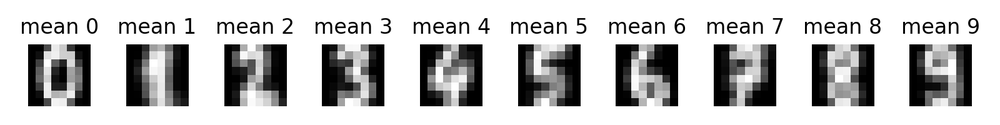</center>

**Indication.**
Utiliser la fonction `subplot` de Matplotlib.

Finalement, nous allons implémenter notre propre classifieur: pour une nouvelle image de chiffre numérisé, on prédit la classe dont le chiffre moyen est le plus proche.
Pour cela on partage notre jeu de données en deux parties de tailles semblables:
la première partie servira de données d'entraînement (`X_train` et `y_train`); la seconde partie servira de données de tests (`X_test` et `y_test`).

**g)**
Définir les variables: `X_train`, `y_train`, `X_test` et `y_test`.

**h)**
Pour chaque chiffre de l'ensemble d'entraînement, calculer les centroïdes (c'est-à-dire les chiffres moyens) des classes de 0 à 9.
On notera la variable contenant l'ensemble des moyennes `centroids_train`.

**i)**
Écrire une fonction qui, donné un chiffre de l'ensemble de test (`X_test`), retourne le centroïde de `centroids_train` le plus proche dans la norme euclidienne.

**j)**
Finalement, évaluer si le chiffre ainsi obtenu correspond au vrai chiffre en utilisant `y_test`
et en déduire une estimation du pourcentage de bonnes prédictions sur l'ensemble de test.

# Exercice 12.5: <font color="red">!</font> Différentiation automatique

Le but de cet exercice est d'aborder une des briques fondamentales de l'apprentissage automatique: la différentiation automatique.
Il s'agit d'une technique permettant de calculer des dérivées ou gradients de fonctions Python de manière pratiquement transparente pour l'utilisateur.
Donné une certaine fonction Python `f(x)`, le but de la différentiation automatique est qu'il soit presque aussi facile pour l'utilisateur d'évaluer la dérivée de `f` en un point `x=1` que de faire `f(1)`, et ce même si la fonction $f$ est compliquée.
Il s'agit de la brique fondamentale permettant à l'apprentissage automatique d'apprendre des paramètres en optimisant des fonctions non-linéaires compliquées.

L'idée de la différentiation automatique est d'utiliser la règle de dérivation des fonctions composées et la connaissance des dérivées des fonctions de bases. En effet, une fonction Python est «juste» une composition de fonctions (ou instructions) de bases.

Par simplicité, on s'intéresse ici uniquement à la composition de fonctions sur $\mathbb{R}$. Pour tout $i\in\{0,1,\dots,n\}$, soit $f_i:\mathbb{R}\to\mathbb{R}$ une fonction élémentaire dont on connait la dérivée. On considère la composition des $i\leq n$ premières fonctions:

$$
F_i = f_i \circ f_{i-1} \circ \cdots \circ f_1 \circ f_0 \,.
$$

La dérivée est donnée par la règle de composition (ou règle de chaîne):

$$
F_i^\prime = (f_i \circ F_{i-1})^\prime = (f_i^\prime \circ F_{i-1}) \cdot F_{i-1}^\prime \,.
$$

Cela donne une manière récursive de calculer $F_n^\prime$ avec l'ancrage $F_0^\prime = f_0^\prime$.
Pour calculer la valeur de $F_n(x)$ pour un $x$ donné, Pyhon va intrinsèquement calculer successivement  $F_0(x)$, puis $F_1(x)$, $F_2(x)$, jusqu'à $F_n(x)$.
La différentiation automatique consiste à évaluer en même temps ou ultérieurement $F_0^\prime(x)$, $F_1^\prime(x)$ jusqu'à $F_n^\prime(x)$.

À noter que la différentiation automatique n'est pas une approximation numérique ni du calcul symbolique. En effet, la valeur de la dérivée est déterminée exactement (à la précision machine), ce qui n'est pas le cas avec une approximation numérique du type:

$$
f^\prime(x) \approx \frac{f(x+h)-f(x)}{h} \,,
$$

avec un certain $h>0$ petit.
Ce n'est pas non plus du calcul symbolique, car il n'y a aucun symbole dans la différentiation automatique, seulement des nombres réels. La différentiation automatique calcule la valeur de la dérivée en un point donné, alors que la différentiation symbolique le fait pour un symbole quelconque.

**a)**
La première étape est de définir les dérivées des fonctions élémentaires. Pour cela, construire les tuples $\tilde{f} = (f,f^\prime)$ manuellement pour les fonctions élémentaires $\sin$, $\cos$, $\operatorname{op}:x\mapsto -x$, $\operatorname{inv}:x\mapsto x^{-1}$ et $\operatorname{square}:x\mapsto x^2$.

**b)**
Une composition de fonctions $F_n = f_n \circ f_{n-1} \circ \cdots \circ f_1 \circ f_0$, sera stockée en Python comme la liste de tuples $[\tilde{f}_0, \tilde{f}_1, \dots \tilde{f}_n]$.
Définir ainsi en Python la composition correspondante à la fonction:

$$
F(x) = \cos\left(\frac{1}{\sin(-\cos x^{2})^{2}}\right).
$$

**c)**
Écrire une fonction `eval(liste, x)` qui donné une liste de tuples définissant une composition de fonctions $F_n$, retourne $F_n(x)$. Tester sur l'exemple précédent.

**d)**
Écrire une fonction `autodiff(liste, x)` qui donné une liste de tuple définissant une composition de fonctions $F_n$, retourne $F_n(x)$ et $F_n^\prime(x)$. Tester à nouveau sur le même exemple.

L'approche précédente ne permet que la composition de fonctions d'une variable, ce qui est très limitant, la somme et la multiplication étant des fonctions de deux variables. L'idée est de pouvoir également considérer des fonctions plus compliquées, comme par exemple:

$$
G(x) = \frac{\cos(x)}{\sin(x) + \cos(x)\sin(x^2) } \,.
$$

**e)**
Implémenter sous forme de tuple comme précédemment les fonctions somme $\operatorname{add}:x,y \mapsto x+y$ et multiplication $\operatorname{mult}:x,y \mapsto xy$.

**f)**
La fonction précédente $G$ ne peut plus être représentée en Python sous la forme d'une liste de composition, car elle a la structure d'un graphe:

<center>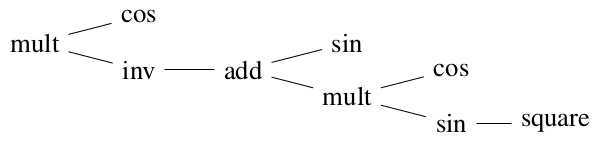</center>

On choisit de la stocker en Python sous forme de liste de liste, avec comme premier élément de chaque liste la fonction à appliquer, les arguments étant les éléments suivants. Pour l'example $G$ précédent:

In [76]:
myG = [mult, [cos], [inv, [add, [sin], [mult, [cos], [sin, [square]]]]]]

Écrire la composition simple précédente $F$ sous cette nouvelle forme, ainsi que la fonction:

$$
H(x) = \frac{\cos(x^{2})+\sin x}{\cos x+2\sin(x^{-1})} \,.
$$

**g)**
Écrire une fonction `eval(liste,x)` permettant d'évaluer au point `x` une expression sous forme de liste de listes, décrite précédemment. Tester sur les fonctions $F$, $G$ et $H$.

**h)**
<font color="red">!!</font> Écrire une fonction `autodiff(liste,x)` qui en plus de retourner l'évaluation de la fonction en `x` retourne également l'évaluation de sa dérivée en `x`.

**i)**
<font color="red">!!</font> L'implémentation précédente n'est pas très utilisable concrètement. En pratique, la différentiation automatique se code en surchargeant les opérations de bases, dans le but d'être relativement transparente pour l'utilisateur.
En utilisant le paquet [JAX](https://jax.readthedocs.io/) ou [PyTorch](https://pytorch.org/), déterminer la dérivée de la fonction suivante par différentiation automatique en `x=0.4`:

In [88]:
def f(x):
    for i in range(50):
        if x>0.5:
            x = 3.7*x*(1-x)
        else:
            x = 3*x*(1-x)
    return x

Finalement, comparer avec la différentiation numérique.

**Indication.**
Pour JAX, voir la documentation sur la différentiation automatique [ici](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html) et, pour PyTorch, [ici](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

# Exercice 12.6: <font color="red">!</font> Réseau de neurones

Le but de cet exercice est d'introduire la notation de réseau de neurones pour retrouver une fonction réelle dont on ne connaît que son évaluation bruitée.
Plus précisément, on considère la fonction $f:[0,1]\to\mathbb{R}$ définie par:

$$
f(x) = 1 + \sin(4\cos x)^2 \,,
$$

et on considère les données générées par 500 évaluations bruitées de $f$:

In [94]:
rng = np.random.default_rng(123456)
f = lambda x: 0.1 + np.sin(4*np.cos(x))**2
x = rng.random(500)
y = f(x) + rng.normal(0,0.1,500)

Le but est d'oublier que les données ont étés générées de cette façon et de retrouver une fonction approchant $f$ uniquement à partir de `x` et `y`.
Pour cela, un réseau de neurones à une couche sera utilisé. On parle d'apprentissage de la fonction à partir des données.
Le principe est de construire la fonction apprise sous la forme:

$$
f_{\boldsymbol{\omega}}(x) = \frac{1}{n}\sum_{i=0}^{n-1} w_i \sigma(a_i x+b_i) \,,
$$

où $\boldsymbol{\omega} = (\boldsymbol{a},\boldsymbol{b},\boldsymbol{w}) \in \mathbb{R}^n \times \mathbb{R}^n \times \mathbb{R}^n$ sont des paramètres à déterminer et $\sigma$ la fonction sigmoïde:

$$
\sigma(x) = \frac{1}{1+e^{-x}} \,.
$$

Il s'agit d'un réseau de neurones à une couche avec $n$ neurones. Le principe est de sommer $n$ fonctions non-linéaires (les sigmoïdes) avec des poids d'entrée $\boldsymbol{a}=(a_i)_{i=0}^{n-1}$, des biais $\boldsymbol{b}=(b_i)_{i=0}^{n-1}$ et des poids de sortie $\boldsymbol{w}=(w_i)_{i=0}^{n-1}$.
Le choix des paramètres se fait de manière à minimiser la fonction de coût suivante:

$$
J(\boldsymbol{\omega}) = \sum_{k=0}^{499} \bigl(f_{\boldsymbol{\omega}}(x_k) - y_k\bigr)^2 \,.
$$

La stratégie pour minimiser $J$ sur les paramètres $\boldsymbol{\omega}$ est d'effectuer une descente de gradient en commençant avec des valeurs aléatoires des paramètres $\boldsymbol{\omega}_0$ puis en définissant successivement:

$$
\boldsymbol{\omega}_{i+1} = \boldsymbol{\omega}_{i} - \eta J^\prime(\boldsymbol{\omega}_i) \,,
$$

où $J^\prime(\boldsymbol{\omega})$ désigne le gradient de $J(\boldsymbol{\omega})$ par rapport aux paramètres, et $\eta\in(0,1]$ est un paramètre appelé taux d'apprentissage.
L'idée de l'algorithme de descente de gradient est de faire bouger les paramètres dans la direction de plus fort gradient afin de minimiser $J(\boldsymbol{\omega})$. On parle d'apprentissage des paramètres.

**a)**
Représenter graphiquement les données `x` et `y` ainsi que la fonction $f$.

**b)**
Déterminer la valeur de la fonction de coût $J$ pour la fonction $f$:

$$
J_f = \sum_{k=0}^{499} \bigl(f(x_k) - y_k\bigr)^2 \,.
$$

**c)**
Définir la fonction sigmoïde $\sigma$ en Python ainsi que sa dérivée $\sigma^\prime$ et représenter la sigmoïde graphiquement.

**d)**
Implémenter en Python une fonction `F(x,omega)` correspondante à la fonction $f_{\boldsymbol{\omega}}(x)$. Faire en sorte que la fonction `F(x,omega)` soit vectorisée, c'est-à-dire si $x=(x_0,x_1,\dots x_{k-1})\in\mathbb{R}^k$ alors la fonction renvoie $(f_{\boldsymbol{\omega}}(x_0), f_{\boldsymbol{\omega}}(x_1), \dots, f_{\boldsymbol{\omega}}(x_{k-1}))$.

**e)**
Calculer à la main le gradient de $f_{\boldsymbol{\omega}}(x)$ par rapport à $\boldsymbol{\omega}$ (et non pas par rapport à $x$) et implémenter ce gradient en Python, en prenant soin qu'il soit également vectorisé.

**f)**
Implémenter en Python $J(\boldsymbol{\omega})$ ainsi que son gradient $J^\prime(\boldsymbol{\omega})$.

**g)**
Avec le taux d'apprentissage $\eta=0.01$ et quatre neurones, apprendre les paramètres $\boldsymbol{\omega}\in\mathbb{R}^{12}$ qui tendent à minimiser $J$.
Comparer la valeur de la fonction coût $J(\boldsymbol{\omega})$ de la fonction $f_{\boldsymbol{\omega}}$ apprise avec la valeur de la fonction coût $J_f$ de la fonction $f$.
Représenter graphiquement la fonction $f_{\boldsymbol{\omega}}$ en fonction de $x$ pour ces paramètres et comparer avec la fonction $f$.